# Velocity Analysis

In this notebook I will examine stellar and gaseous radial velocities within the SMC Wing.

## Import modules

In [94]:
# Standard
import numpy as np
import matplotlib.pyplot as plt

# Auxillary
import smc
import matplotlib.patches as patches
import scipy.integrate as integrate

## Stellar radial velocities from Ramachandran et. al. 2019

In [11]:
# Original stellar radial velocity file

# Original files
data = np.genfromtxt('../data/foreground_corrected_photometry_and_stellar_parameters', dtype = None, names = True)

id_number, ra, dec, nuv_v, nuv, b_v, v = data['id_1'], data['ra_1'], data['dec_1'], \
data['nuv_v'], data['nuv'], data['b_v'], data['v']

spectype = data['SpectralType']
stellar_vrad = data['vrad']

print("There are {} field stars in our sample".format(len(id_number)))

There are 110 field stars in our sample


/Users/leahfulmer/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  after removing the cwd from sys.path.


## HI radial velocity measurements from HI data cube by Stanimirovic et. al. 1999

In [12]:
# Original HI radial velocity measurements
HI = np.genfromtxt('../data/HI_radial_velocity', dtype = None, names = True)

# Define variables
HI_velocity_ms = HI['vrad']
HI_velocity_kms = HI_velocity_ms / 1000
HI_temperature = HI['temperature']

## HII radial velocity measurement from SALT

In [13]:
# HII radial velocity average
central = 166     # [km/s]
error = 5     # +- [km/s]

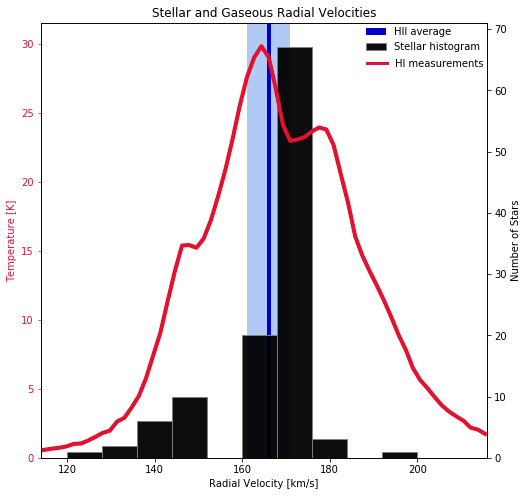

In [14]:
# Plot parameters
fig, ax1 = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
ax2 = ax1.twinx()

# Define representation of HII radial velocity data
HII_central = patches.Rectangle((central-0.46,0), 2*0.46, 71, linewidth=1, \
                                facecolor='mediumblue', label='HII average')
HII_error = patches.Rectangle((central-error,0), error*2, 71, linewidth=1, \
                              facecolor='cornflowerblue', alpha=0.5)

# HII average
ax1.add_patch(HII_error)
ax1.add_patch(HII_central)

# Stellar histogram
ax1.hist(stellar_vrad, facecolor='k', edgecolor='grey', label='Stellar histogram', alpha=0.95)
ax1.set_title('Stellar and Gaseous Radial Velocities')
ax1.set_xlabel('Radial Velocity [km/s]')
ax1.set_xlim(114, 216)
ax1.set_ylim(0, 71)
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Number of Stars', color='k')
ax1.tick_params('y', colors='k')
ax1.legend(bbox_to_anchor=(0.992, 1), loc=1, borderaxespad=0., prop={'size':10}, frameon=False)

# HI data
plt.plot(HI_velocity_kms, HI_temperature, linewidth=4, color='r')
plt.plot(HI_velocity_kms, HI_temperature, linewidth=3, color='crimson', label="HI measurements")
ax2.set_ylabel('Temperature [K]', color='crimson')
ax2.set_ylim(0, 31.5)
ax2.yaxis.set_label_position("left")
ax2.yaxis.tick_left()
ax2.tick_params('y', colors='crimson')
ax2.legend(bbox_to_anchor=(1.0, 0.928), loc=1, borderaxespad=0., prop={'size':10}, frameon=False)

plt.savefig("images/Radial_Velocity_Analysis.jpg")
plt.show()

## HI mass analysis

In [93]:
# Compute HI mass
integrated_HI = integrate.simps(HI_temperature, x=HI_velocity_kms) # K*km/s
N_H = 1.8E18 * integrated_HI # atoms / cm**2
mass_H_atom = 1.67e-24 # grams
average_mass_ISM_atom = mass_H_atom * 4/3 # g/atom
average_mass_ISM = average_mass_ISM_atom * N_H # g/cm**2

# WHERE DOES THIS COME FROM?!
area_arcsec_squared = 2272500 # arcsec**2
area_parsec_squared = 2272500 * 0.09 # pc**2
area_cm_squared = area_parsec_squared * 3.086e+18**2 # cm**2

mass_ISM_grams = average_mass_ISM * area_cm_squared # grams
Msol = 1.989e33 # solar masses
mass_ISM_Msol = mass_ISM_grams / Msol # solar masses

# Integrate over the HI gas temperature above
print('The above HI data give an integrated HI measurement of {} K*km/s. \n\n\
The average column density of HI in a beam scales with the integral of the temperature \
over a given velocity range. Our average column density is {:0.3e} atoms / cm**2. \n\n\
The mass of an H atom is {:0.3e} grams. If we account for Helium and other chemical \
elements we multiply the H mass by 4/3 (an approximation). Thus the average mass per \
atom including He and metals is about {:0.3e} g/atom. Our average mass per area is {:0.3e} g/cm**2. \n\n\
At d = 61 kpc, 1 arcsec = .3 pc and 1 arcsec**2 = (.3)**2 = 0.09 pc**2. Our \
measured area of {:0.3e} arcsec**2 corresponds to {:0.3e} pc**2 or {:0.3e} cm**2. \n\n\
The total observed HI mass is therefore {:0.3e} grams or {:0.3e} solar masses. \n\n\
RATIO OF HI MASS TO STELLAR MASS TO COME.'\
# The ratio of HI mass to stellar mass is mass_ISM_Msol / stellar mass from isochrone analysis
      .format(np.round(integrated_HI, 2), N_H, mass_H_atom, average_mass_ISM_atom, average_mass_ISM, \
             area_arcsec_squared, area_parsec_squared, area_cm_squared, mass_ISM_grams, mass_ISM_Msol))



The above HI data give an integrated HI measurement of 1231.35 K*km/s. 

The average column density of HI in a beam scales with the integral of the temperature over a given velocity range. Our average column density is 2.216e+21 atoms / cm**2. 

The mass of an H atom is 1.670e-24 grams. If we account for Helium and other chemical elements we multiply the H mass by 4/3 (an approximation). Thus the average mass per atom including He and metals is about 2.227e-24 g/atom. Our average mass per area is 4.935e-03 g/cm**2. 

At d = 61 kpc, 1 arcsec = .3 pc and 1 arcsec**2 = (.3)**2 = 0.09 pc**2. Our measured area of 2.272e+06 arcsec**2 corresponds to 2.045e+05 pc**2 or 1.948e+42 cm**2. 

The total observed HI mass is therefore 9.613e+39 grams or 4.833e+06 solar masses. 

RATIO OF HI MASS TO STELLAR MASS TO COME.
